In [60]:
import pandas as pd
from sklearn. preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import numpy as np
import pandas
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.manifold import TSNE, Isomap

In [61]:
df1 = pd.read_csv(r"../data/winequality-red.csv",decimal=",",delimiter=";")
df2 = pd.read_csv(r"../data/winequality-white.csv",decimal=",",delimiter=";")
df1.insert (loc= len(df1.columns) , column='color', value=6)
df2.insert (loc= len(df2.columns) , column='color', value=7)
data = pd.concat([df1, df2], axis = 0,ignore_index = True)
data['fixed acidity'] = data['fixed acidity'].astype(float)
data['volatile acidity'] = data['volatile acidity'].astype(float)
data['citric acid'] = data['citric acid'].astype(float)
data['residual sugar'] = data['residual sugar'].astype(float)
data['chlorides'] = data['chlorides'].astype(float)
data['free sulfur dioxide'] = data['free sulfur dioxide'].astype(float)
data['total sulfur dioxide'] = data['total sulfur dioxide'].astype(float)
data['density'] = data['density'].astype(float)
data['pH'] = data['pH'].astype(float)
data['sulphates'] = data['sulphates'].astype(float)
data['alcohol'] = data['alcohol'].astype(float)
data.drop_duplicates(inplace=True)
data.duplicated().sum()
outlier=x = data.drop(["color", "quality"], axis=1)
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3 - Q1
data_f = outlier[~((outlier < (Q1 - 1.5 * IQR)) | (outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
index_list = list(data_f.index.values)
data_f = data[data.index.isin(index_list)]
datareg=data_f

y_reg = data["quality"]
x_reg = data.drop("quality", axis=1)

In [62]:
data=pd.read_csv("../data/weatherAUS.csv")
data.dropna(inplace=True,ignore_index=True)
f = lambda x : str(x)[5:7]
data['Date'] = data['Date'].transform(f)
data['Date'] = data['Date'].astype(int)
f = lambda x : 0 if (x == "No") else 1
data['RainToday'] = data['RainToday'].transform(f)
data['RainToday'] = data['RainToday'].astype(int)

data['RainTomorrow'] = data['RainTomorrow'].transform(f)
data['RainTomorrow'] = data['RainTomorrow'].astype(int)
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical_encoder = OneHotEncoder(sparse_output=False)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('cat', categorical_encoder, categorical_features)
     ])
# Получите закодированные функции в виде DataFrame.
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(data)
encoded_features.head()
data=data.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1)
df = pd.concat([
    data,
    encoded_features
], axis=1)
df_major_0 = df[df["RainTomorrow"] == 0]
df_minor_1 = df[df["RainTomorrow"] == 1]

df_major_0_undersampled = df_major_0.sample(len(df_minor_1))

dataclass = pd.concat([df_major_0_undersampled, df_minor_1], axis=0)

x_class=dataclass.drop(['RainTomorrow'],axis=1)
y_class=dataclass['RainTomorrow']

In [63]:
from sklearn.ensemble import BaggingClassifier
def test_class(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))
  print("accuracy 0.8")

In [64]:
test_class(x_class, y_class)

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      4111
           1       0.81      0.76      0.78      4091

    accuracy                           0.79      8202
   macro avg       0.79      0.79      0.79      8202
weighted avg       0.79      0.79      0.79      8202

accuracy 0.8


In [65]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def test_reg(X, y):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  bag = BaggingClassifier().fit(x_train, y_train)
  print(f'MAE: {mean_absolute_error(y_test, bag.predict(x_test))}')
  print(f'MSE: {mean_squared_error(y_test, bag.predict(x_test))}')
  print(f'RMSE: {sqrt(mean_squared_error(y_test, bag.predict(x_test)))}')
  print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, bag.predict(x_test)))}')
  print(f'R^2: {bag.score(x_test, y_test)}')
  print("r2 0.53")

In [66]:
test_reg(x_reg, y_reg)

MAE: 0.5546697038724373
MSE: 0.714123006833713
RMSE: 0.8450579902194364
MAPE: 0.3136640376882359
R^2: 0.5182232346241458
r2 0.53


## Variance Treshold

In [76]:
from sklearn.feature_selection import VarianceThreshold
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(75)
X_vt = vt.fit_transform(x_class)

print(x_class.shape)
print(X_vt.shape)

X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
test_class(X_vt, y_class)

(24854, 92)
(24854, 5)
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4002
           1       0.77      0.67      0.71      4200

    accuracy                           0.73      8202
   macro avg       0.73      0.73      0.73      8202
weighted avg       0.73      0.73      0.73      8202

accuracy 0.8


In [74]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(x_reg)

print(x_reg.shape)
print(X_vt.shape)

X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
test_reg(X_vt, y_reg)

(5320, 12)
(5320, 5)
MAE: 0.5905466970387244
MSE: 0.7818906605922551
RMSE: 0.8842458145743496
MAPE: 0.32212484798305746
R^2: 0.49658314350797267
r2 0.53


## SelectKBest

In [77]:
skb = SelectKBest(k=5)
X_skb = skb.fit_transform(x_class, y_class)

print(x_class.shape)
print(X_skb.shape)

X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
test_class(X_skb, y_class)

(24854, 92)
(24854, 5)
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      4062
           1       0.74      0.68      0.71      4140

    accuracy                           0.72      8202
   macro avg       0.72      0.72      0.72      8202
weighted avg       0.72      0.72      0.72      8202

accuracy 0.8


In [78]:
skb = SelectKBest(k=5)
X_skb = skb.fit_transform(x_reg, y_reg)

print(x_reg.shape)
print(X_skb.shape)

X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
test_reg(X_skb, y_reg)

(5320, 12)
(5320, 5)
MAE: 0.6042141230068337
MSE: 0.821753986332574
RMSE: 0.9065064734090839
MAPE: 0.32962877986635264
R^2: 0.4920273348519362
r2 0.53


## RFE

In [80]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(x_class, y_class)

rfe = RFE(estimator=tree, n_features_to_select=5).fit(x_class, y_class)
X_rfe = pd.DataFrame(rfe.transform(x_class), columns=rfe.get_feature_names_out())

print(x_class.shape)
print(X_rfe.shape)

test_class(X_rfe, y_class)

(24854, 92)
(24854, 5)
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4115
           1       0.78      0.74      0.76      4087

    accuracy                           0.77      8202
   macro avg       0.77      0.77      0.77      8202
weighted avg       0.77      0.77      0.77      8202

accuracy 0.8


In [112]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_reg, y_reg)

rfe = RFE(estimator=tree, n_features_to_select=3).fit(x_reg, y_reg)
X_rfe = pd.DataFrame(rfe.transform(x_reg), columns=rfe.get_feature_names_out())

print(x_reg.shape)
print(X_rfe.shape)

test_reg(X_rfe, y_reg)

(5320, 12)
(5320, 3)
MAE: 0.6486332574031891
MSE: 0.9276765375854215
RMSE: 0.9631596635996659
MAPE: 0.3370953909499557
R^2: 0.47095671981776766
r2 0.53


## PCA

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(x_class, y_class)

print(x_class.shape)
print(X_pca.shape)

test_class(X_pca, y_class)
# посмотрим сколько информации сохранилось
sum(pca.explained_variance_ratio_)

(24854, 92)
(24854, 5)
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      4099
           1       0.77      0.70      0.73      4103

    accuracy                           0.74      8202
   macro avg       0.75      0.74      0.74      8202
weighted avg       0.75      0.74      0.74      8202

accuracy 0.8


0.888675525139976

In [113]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_reg, y_reg)

print(x_reg.shape)
print(X_pca.shape)

test_reg(X_pca, y_reg)
sum(pca.explained_variance_ratio_)

(5320, 12)
(5320, 3)
MAE: 0.7693621867881549
MSE: 1.1543280182232347
RMSE: 1.0743965833076885
MAPE: 0.36820368077591864
R^2: 0.39806378132118453
r2 0.53


0.9991652753794793

## tSNE

In [94]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x_class)

print(x_class.shape)
print(X_tsne.shape)

test_class(X_tsne, y_class)

(24854, 92)
(24854, 2)
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      4058
           1       0.77      0.71      0.74      4144

    accuracy                           0.74      8202
   macro avg       0.75      0.74      0.74      8202
weighted avg       0.75      0.74      0.74      8202

accuracy 0.8


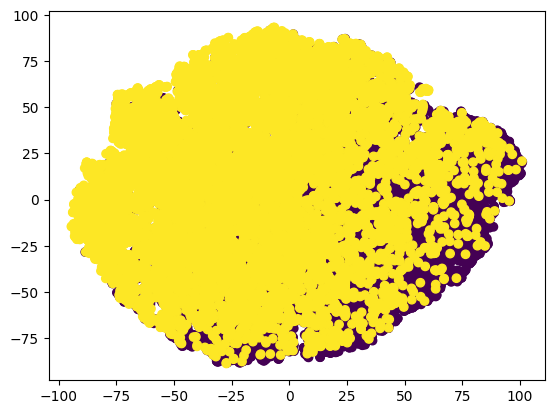

In [95]:
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_class)

In [100]:
tsne = TSNE(n_components=2)
X_tsner = tsne.fit_transform(x_reg)

print(x_reg.shape)
print(X_tsner.shape)

test_reg(X_tsner, y_reg)

(5320, 12)
(5320, 2)
MAE: 0.7391799544419134
MSE: 1.082004555808656
RMSE: 1.040194479801088
MAPE: 0.3601667641330101
R^2: 0.4083143507972665
r2 0.53


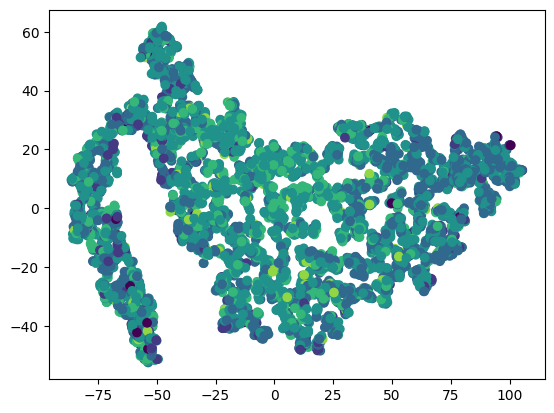

In [102]:
plt.scatter(X_tsner[:,0], X_tsner[:,1], c=y_reg)

## Isomap

In [104]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(x_reg)

print(x_reg.shape)
print(X_iso.shape)

test_reg(X_iso, y_reg)


(5320, 12)
(5320, 2)
MAE: 0.7796127562642369
MSE: 1.1759681093394077
RMSE: 1.0844206330291801
MAPE: 0.3722642188827383
R^2: 0.38838268792710706
r2 0.53


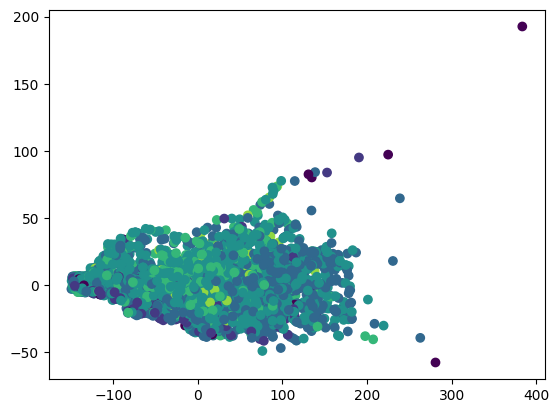

In [106]:
plt.scatter(X_iso[:,0], X_iso[:,1], c=y_reg)

In [107]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(x_class)

print(x_class.shape)
print(X_iso.shape)

test_class(X_iso, y_class)

(24854, 92)
(24854, 2)
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      4082
           1       0.73      0.69      0.71      4120

    accuracy                           0.71      8202
   macro avg       0.71      0.71      0.71      8202
weighted avg       0.71      0.71      0.71      8202

accuracy 0.8


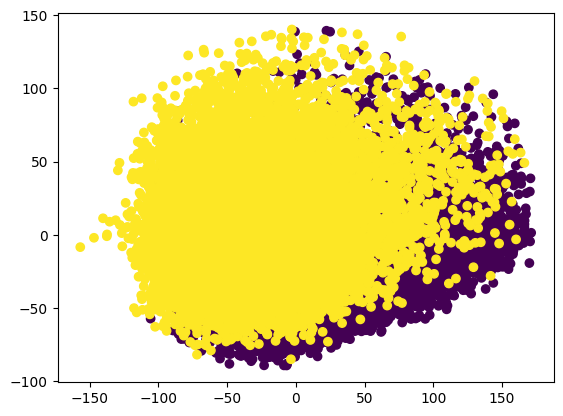

In [108]:
plt.scatter(X_iso[:,0], X_iso[:,1], c=y_class)

Лучше всех с задачей понижения размерности данных для классификации справилась РСА, для регрессии RFE